<a href="https://colab.research.google.com/github/tsanifaishal/MachineLearningTasks/blob/main/7thWeekTasks/Task_7_XGBoost_M_Tsani_Faishal_Azhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : M Tsani Faishal Azhar

NIM : 110321014

Judul : Task 7, model , dataset melb house

Prompt : Act as Machine learning engineer, please generate python code to write on google colab for the following steps:
Load the data of melb_data.csv that already exist on google drive
do feature engineering
visualize the data
split the data 70% for data train
train using xgb, random forest, decision tree
evaluate using MAE

In [8]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer


In [9]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:

# Load the data
melb_data_path = '/content/drive/MyDrive/Dataset/melb_data.csv'
melb_data = pd.read_csv(melb_data_path)


In [11]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [12]:
# Drop rows with missing values
melb_data_cleaned = melb_data.dropna()
melb_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   int64  
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   int64  
 10  Bedroom2       6196 non-null   int64  
 11  Bathroom       6196 non-null   int64  
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   int64  
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtitude  

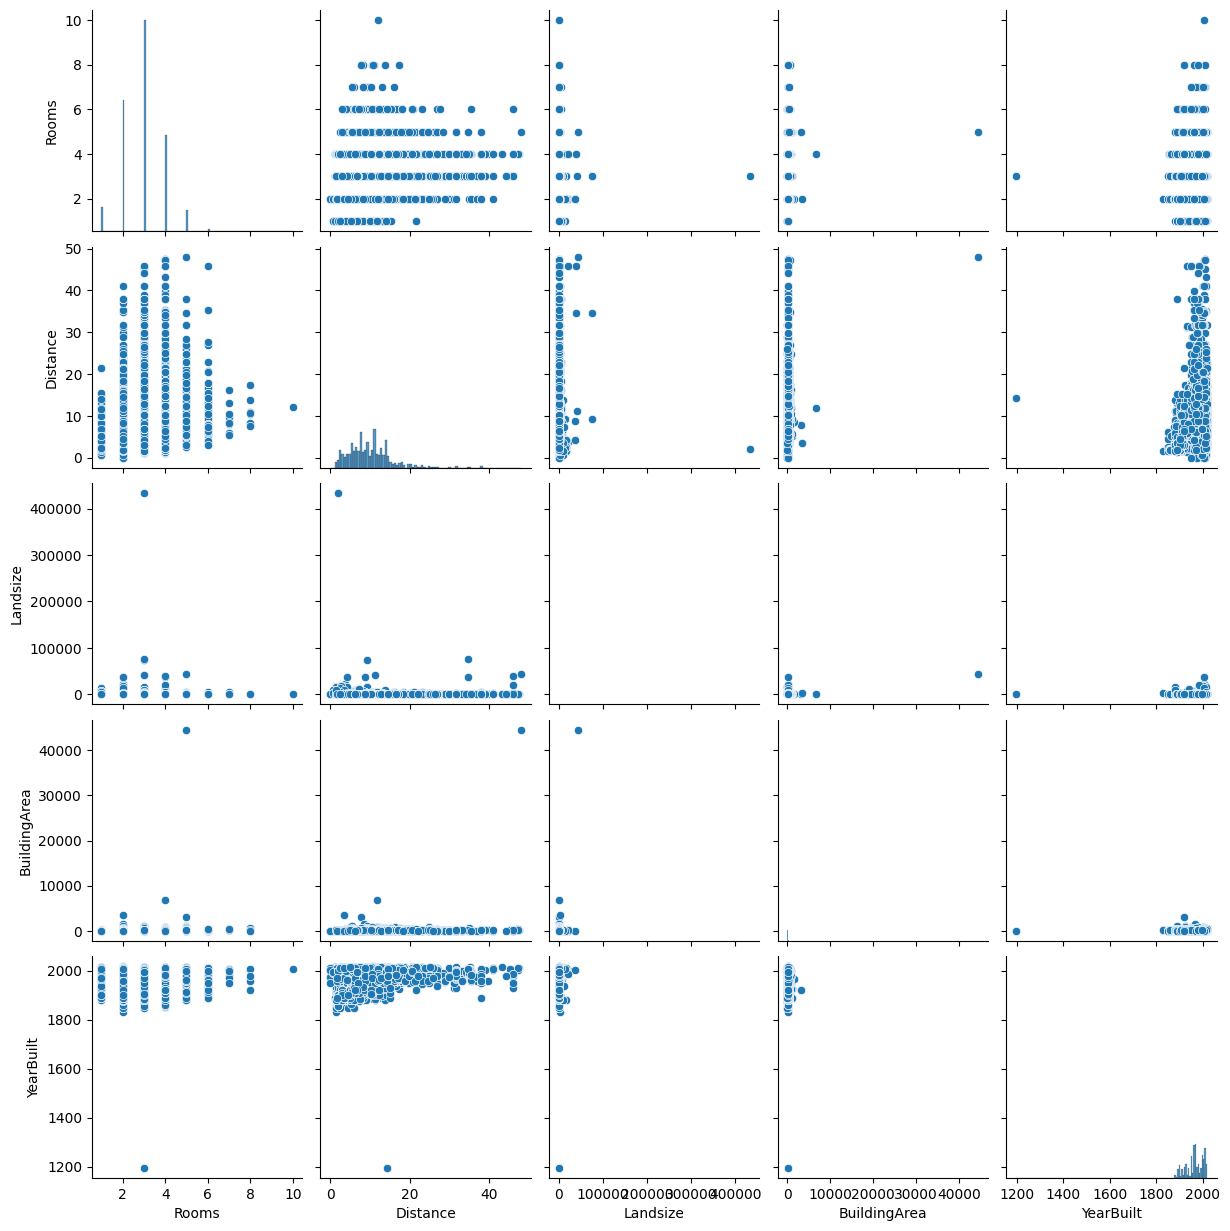

In [13]:
# Visualize the data (you can modify this part based on your requirements)
sns.pairplot(melb_data[numerical_features])
plt.show()


In [15]:


# Feature Engineering (using numerical features)
numerical_features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = melb_data_cleaned[numerical_features]
y = melb_data_cleaned['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train using Random Forest with imputed data
rf_model = RandomForestRegressor()
rf_model.fit(X_train_imputed, y_train)

# Train using Decision Tree with imputed data
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_imputed, y_train)

# Train using XGBoost with imputed data
xgb_model = XGBRegressor()
xgb_model.fit(X_train_imputed, y_train)

# Function to evaluate model using MAE
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    return mae

# Evaluate using MAE
xgb_mae = evaluate_model(xgb_model, X_test_imputed, y_test)
rf_mae = evaluate_model(rf_model, X_test_imputed, y_test)
dt_mae = evaluate_model(dt_model, X_test_imputed, y_test)

print("XGBoost MAE with imputation and dropped missing values:", xgb_mae)
print("Random Forest MAE with imputation and dropped missing values:", rf_mae)
print("Decision Tree MAE with imputation and dropped missing values:", dt_mae)


XGBoost MAE with imputation and dropped missing values: 222286.78807490587
Random Forest MAE with imputation and dropped missing values: 226308.59154973234
Decision Tree MAE with imputation and dropped missing values: 302649.00107584725
